Training images: 20
Test images: 20


C:\Users\vmadh\AppData\Local\Temp\ipykernel_16088\1150749038.py:15: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)


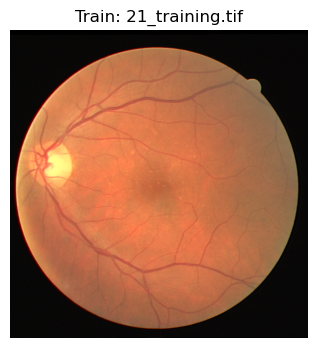

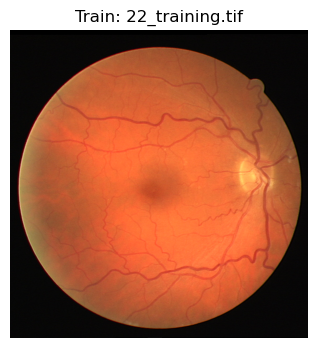

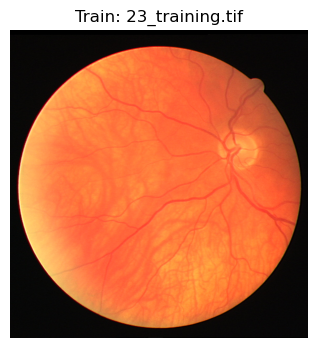

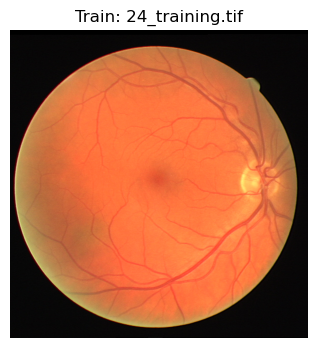

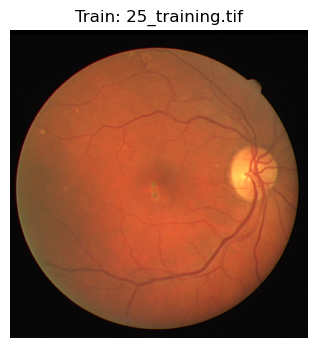

In [1]:
from pathlib import Path
import imageio
import matplotlib.pyplot as plt

train_path = Path("data/raw/DRIVE/training/images")
test_path = Path("data/raw/DRIVE/test/images")

train_images = list(train_path.glob("*.tif"))
test_images = list(test_path.glob("*.tif"))

print("Training images:", len(train_images))
print("Test images:", len(test_images))

for img_path in train_images[:5]:
    img = imageio.imread(img_path)
    plt.figure(figsize=(4,4))
    plt.imshow(img)
    plt.title(f"Train: {img_path.name}")
    plt.axis("off")

plt.show()


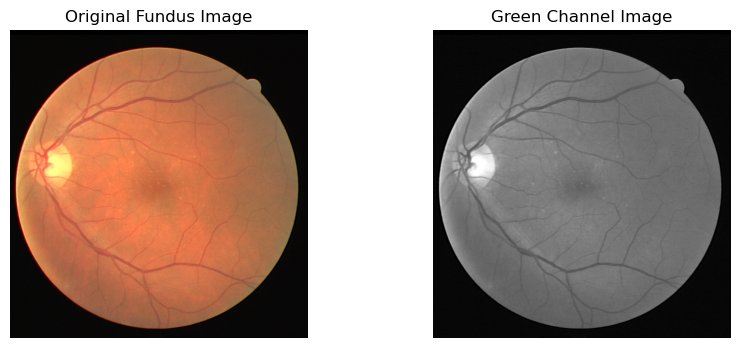

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Pick one sample training image
sample_img_path = train_images[0]

# Read image using OpenCV
img = cv2.imread(str(sample_img_path))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Extract green channel
green_channel = img[:, :, 1]

# Display original vs green channel
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Original Fundus Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(green_channel, cmap="gray")
plt.title("Green Channel Image")
plt.axis("off")

plt.show()


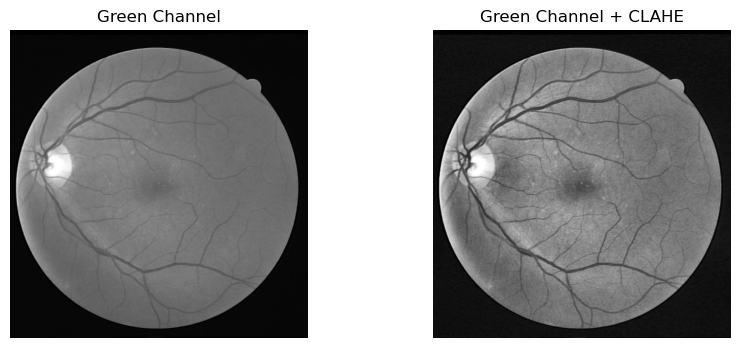

In [3]:
# Apply CLAHE to green channel
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(green_channel)

# Display green channel vs CLAHE enhanced image
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(green_channel, cmap="gray")
plt.title("Green Channel")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(clahe_img, cmap="gray")
plt.title("Green Channel + CLAHE")
plt.axis("off")

plt.show()
